In [285]:
!pip install plotly_express

## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from scipy.optimize import curve_fit
import statsmodels.api as sms
import seaborn as sns

#%matplotlib inline
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# plt.rcParams['figure.figsize'] = [15, 5]
# from IPython import display
# from ipywidgets import interact, widgets



In [14]:
## Read Data for Cases, Deaths and Recoveries
ConfirmedCases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
Deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
Recoveries_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [15]:
ConfirmedCases_raw.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20'],
      dtype='object')

In [270]:
ConfirmedCases_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [16]:
### Melt the dateframe into the right shape and set index
def cleandata(df_raw):
    df_cleaned=df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'],value_name='Cases',var_name='Date')
#     df_cleaned=df_cleaned.set_index(['Country/Region','Province/State','Date'])
    df_cleaned.reset_index()
    return df_cleaned 

# Clean all datasets
ConfirmedCases=cleandata(ConfirmedCases_raw)
Deaths=cleandata(Deaths_raw)
Recoveries=cleandata(Recoveries_raw)

In [17]:
ConfirmedCases.rename(columns={'Country/Region': 'Country'}, inplace=True)
ConfirmedCases['Date'] = pd.to_datetime(ConfirmedCases.Date)

In [18]:
def func_exp(x, a, b):
        return a * np.exp(b * x)

def exponential_regression (x_data, y_data):
    popt, pcov = curve_fit(func_exp, x_data, y_data)
    print(popt)
    puntos = plt.plot(x_data, y_data, 'x', color='xkcd:maroon', label = "data")
    curva_regresion = plt.plot(x_data, func_exp(x_data, *popt), color='xkcd:teal', label = "fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))
    plt.legend()
    plt.show()
    return func_exp(x_data, *popt)

In [19]:
ConfirmedCases.head()

,Province/State,Country,Lat,Long,Date,Cases
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0


In [20]:
# ConfirmedCases.to_numpy().tolist()

In [21]:
italy = ConfirmedCases.query(" Country == 'Italy' ").Cases.to_numpy()
x_data = np.arange(0,len(italy[30:]))
y_data = np.log(italy[30:])

In [22]:
china = ConfirmedCases[ConfirmedCases.Country == 'China']
china = china.groupby(['Country', 'Date'])['Cases'].sum().reset_index().Cases.to_numpy()
x_data = np.arange(0,len(china))
y_data = np.log(china)

In [23]:
# Model for China

china = ConfirmedCases.query(" Country == 'China' ")
china = china.groupby(['Country', 'Date'])['Cases'].sum().reset_index().sort_values('Date').Cases.to_numpy()

x_data = np.arange(0,len(china))
y_data = np.log(china)

mod = sms.OLS(y_data, x_data)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              276.5
Date:                Tue, 24 Mar 2020   Prob (F-statistic):                    2.45e-24
Time:                        19:08:48   Log-Likelihood:                         -181.28
No. Observations:                  62   AIC:                                      364.6
Df Residuals:                      61   BIC:                                      366.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

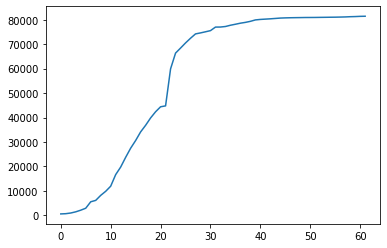

In [24]:
china = ConfirmedCases.query(" Country == 'China' ")
china = china.groupby(['Country', 'Date'])['Cases'].sum().reset_index().sort_values('Date').Cases
china.plot()

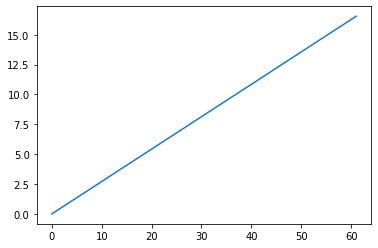

In [25]:
ypred = res.predict(x_data)
plt.plot(ypred)

In [26]:
import datetime
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
current_date = yesterday.strftime("%Y-%m-%d")

In [27]:
df = ConfirmedCases.groupby(['Country', 'Date'])['Cases'].sum().reset_index()
countries = ['Spain', 'France', 'Poland', 'Germany']
# df.Country  countries
# df[df.Date == current_date]


In [28]:
a = np.arange(1,5)

In [29]:
b = np.arange(1,5)

In [30]:
np.true_divide(a,b)

array([1., 1., 1., 1.])

In [31]:
italy = italy[40:]

In [32]:
italy

array([ 2036.,  2502.,  3089.,  3858.,  4636.,  5883.,  7375.,  9172.,
       10149., 12462., 12462., 17660., 21157., 24747., 27980., 31506.,
       35713., 41035., 47021., 53578., 59138., 59138.])

In [33]:
first = italy[:len(italy)-1]
second = italy[1:len(italy)]

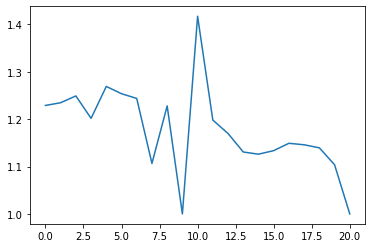

In [34]:
growth = np.true_divide(second, first)
plt.plot(growth)

In [41]:
# funkcja liczaca growth dla ostatnich 20 dni dla danego kraju

def calculate_growth(country, days):

#     days = liczba dni wstecz dla ktorych liczymy growth
#     country = "Italy"

    country_data = ConfirmedCases.query(" Country == @country ").Cases.to_numpy()
    final = country_data[len(country_data)-days: len(country_data)]
    first = final[:len(final)-1] # lista pierwsza 
    second = final[1:len(final)] # druga lista przesunieta o 1, zeby policzyc growth dzienny
    growth = np.true_divide(second, first) #funkcja ktora liczy growth
    
    print(final)
    print(growth)
    plt.plot(growth)  

[  1.   1.   5.   5.  11.  16.  22.  31.  49.  68. 103. 119. 177. 238.
 251. 355. 425. 536. 634. 634.]
[1.         5.         1.         2.2        1.45454545 1.375
 1.40909091 1.58064516 1.3877551  1.51470588 1.15533981 1.48739496
 1.34463277 1.05462185 1.41434263 1.1971831  1.26117647 1.18283582
 1.        ]


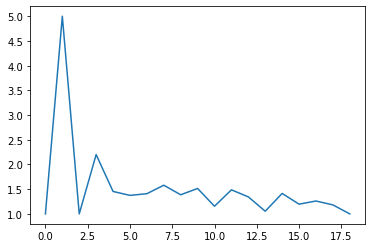

In [321]:
calculate_growth("Poland", 20)

In [330]:

def active_cases(countries):
    
    total_data = pd.DataFrame()
    
    for n, country in enumerate(countries):

        country_data = ConfirmedCases.query(" Country == @country ")[['Cases']].reset_index()
        flag = (country_data['Cases'] > 100)
        country_data = country_data.loc[flag,:]
        country_data = pd.DataFrame(data=country_data)
        days = [x for x in range(1,len(country_data.index)+1)]
        country_data['days'] = days
        country_data = country_data.rename(columns={'Cases':country})
        
        if n == 0:
            total_data = country_data
        
        if n > 0:
            total_data = pd.merge(total_data, country_data[['days',country]], on="days", how="left")

    return total_data

countries = ["Italy", "Spain", "Germany", "Poland" ]

In [322]:
df = active_cases(countries)
df = df.loc[df.days<=9]

''

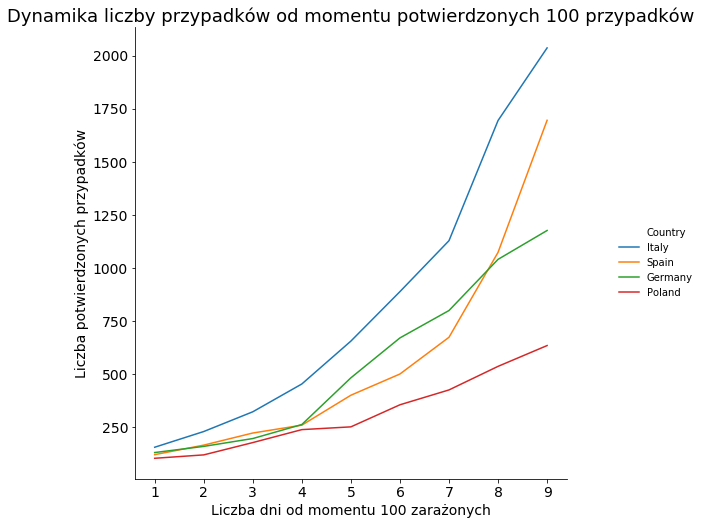

In [340]:
df = active_cases(countries)
df = df.loc[df.days<=9]
del df['index']
df = df.melt(id_vars=['days'], var_name='Country',  value_name='Cases')

sns.relplot(x="days", y="Cases", hue='Country', data=df, height=7, kind="line")
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlabel("Liczba dni od momentu 100 zarażonych", size=(14))
plt.ylabel("Liczba potwierdzonych przypadków", size=(14))
plt.title("Dynamika liczby przypadków od momentu potwierdzonych 100 przypadków", size=(18))
;

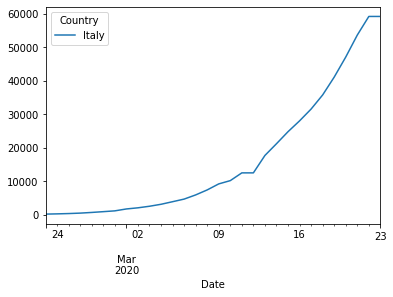

In [183]:
act_cases = act_cases.pivot(index='Date', columns='Country', values='Cases')
act_cases.plot()